In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets

Loading in training and test data.

In [2]:
iris = datasets.load_iris()
X_train = np.concatenate((iris.data[0:40, :2],      
                          iris.data[50:90, :2]))
X_test = np.concatenate((iris.data[40:50, :2],      
                         iris.data[90:100, :2]))
Y_train = np.array(40*[1] + 40*[-1])
Y_test = np.array(10*[1] + 10*[-1])

In [3]:
print("Our first training data is located at coordinates: ", X_train[0])

Our first training data is located at coordinates:  [ 5.1  3.5]


In [4]:
def cost(x, y, w):
    ''' This function defines our cost function.'''
    return sum(np.log(1+np.exp(-y*x.dot(w))))

In [5]:
def gradients(x, y, w):
    '''This function calculates the gradient of the loss function.'''
    misclass_probs = 1/(1+np.exp(y*x.dot(w)))
    return np.diag(-y*misclass_probs) @ x

In [6]:
weights = np.array([0.1, -0.1])
learning_rate = 0.001
costs = []
for it in range(10000):
    train_cost = cost(X_train, Y_train, weights)
    test_cost = cost(X_test, Y_test, weights)
    costs.append([train_cost / X_train.shape[0], test_cost / X_test.shape[0]])
    train_g = gradients(X_train, Y_train, weights)
    weights -= learning_rate * np.sum(train_g, axis=0)

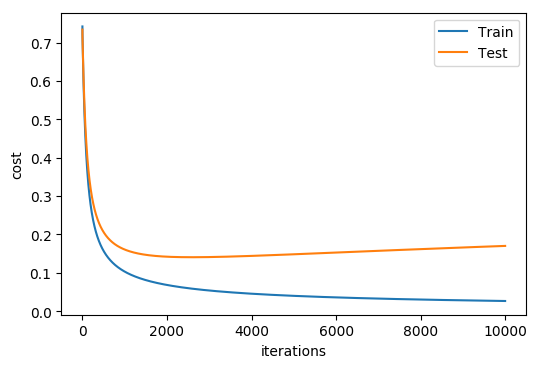

In [7]:
plt.plot(range(10000), costs)
plt.legend(['Train', 'Test'])
plt.xlabel('iterations')
plt.ylabel('cost')

In [8]:
weights = np.array([0.1, -0.1])
learning_rate = 0.001
costs = []
for it in range(10000):
    train_cost = cost(X_train, Y_train, weights)
    test_cost = cost(X_test, Y_test, weights)
    costs.append([train_cost / X_train.shape[0], test_cost / X_test.shape[0]])
    train_g = gradients(X_train, Y_train, weights)
    minibatch_gradient = train_g[np.random.randint(X_train.shape[0])] # it just works fine, but is highly inefficient ofc
    weights -= learning_rate * minibatch_gradient

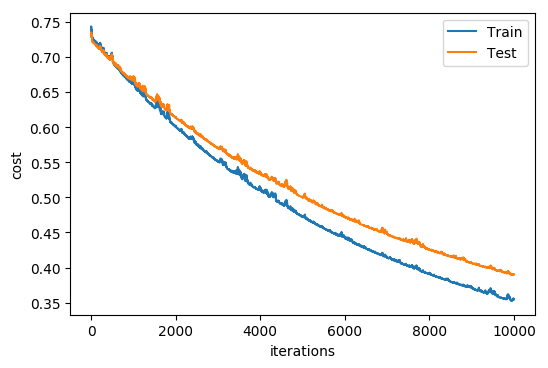

In [9]:
plt.plot(range(10000), costs)
plt.legend(['Train', 'Test'])
plt.xlabel('iterations')
plt.ylabel('cost')

Things to talk about:
* Effects of altering learning rate
* Learning rate decay (e.g. $\eta^{(t)} = \frac{\eta^{(0)}}{1+kt}$ or $\eta^{(t)} = \eta^{(0)} e^{-kt}$ with $k$ being an additional hyperparameter)
* Minibatches of different size
* More advanced SGD variants (e.g. RMSProp, AdaGrad, AdaDelta, Adam, ...)